In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from operator import itemgetter
import sklearn
import matplotlib.colors as colors
from sklearn.cluster import MeanShift
from itertools import cycle
from scipy import ndimage

In [2]:
c =0.299792458
n =1.3195
v=c/n 
print(v)

0.2272015596816976


In [3]:
info = pickle.load(open("../data/DP_Tau1PeV_Big.pkl", "rb"))
data = np.load("../data/DP_Tau1PeV_Big_data.npy",allow_pickle=True,encoding='bytes')
print(len(info), len(data))

216 216


In [4]:
#for i in info[57:58]:
#    print(i['tau_time'])
#    for j in i['doms']:
#        print(j['key'], j['dom_position'])

In [5]:
for event in data:
    for i in event:
        if i[4] < 0:
            i[4] = 0

In [6]:
for i,e in enumerate(info):
    print(i, e["id"],"E_nu={0:2.2e} E_tau={1:2.2e} Qtot={2:.2f}".format(e['nu_energy'], e['tau_energy'], e['qtotal']))

0 (76, 4294967295, 631, 0) E_nu=1.43e+06 E_tau=1.06e+06 Qtot=120.10
1 (86, 4294967295, 261, 0) E_nu=1.32e+06 E_tau=1.16e+06 Qtot=23433.80
2 (72, 4294967295, 409, 0) E_nu=1.07e+06 E_tau=1.03e+06 Qtot=74635.15
3 (72, 4294967295, 436, 0) E_nu=1.17e+06 E_tau=1.07e+06 Qtot=82397.20
4 (72, 4294967295, 737, 0) E_nu=1.05e+06 E_tau=1.02e+06 Qtot=33997.90
5 (30, 4294967295, 99, 0) E_nu=1.53e+06 E_tau=1.00e+06 Qtot=1325.27
6 (30, 4294967295, 189, 0) E_nu=1.00e+06 E_tau=1.00e+06 Qtot=98646.33
7 (30, 4294967295, 277, 0) E_nu=1.55e+06 E_tau=1.16e+06 Qtot=3747.80
8 (30, 4294967295, 533, 0) E_nu=1.35e+06 E_tau=1.10e+06 Qtot=1894.08
9 (19, 4294967295, 133, 0) E_nu=1.07e+06 E_tau=1.07e+06 Qtot=65422.35
10 (19, 4294967295, 314, 0) E_nu=2.21e+06 E_tau=1.08e+06 Qtot=10390.80
11 (28, 4294967295, 340, 0) E_nu=1.15e+06 E_tau=1.11e+06 Qtot=635.07
12 (28, 4294967295, 630, 0) E_nu=1.02e+06 E_tau=1.01e+06 Qtot=645.77
13 (28, 4294967295, 634, 0) E_nu=1.52e+06 E_tau=1.19e+06 Qtot=3869.20
14 (98, 4294967295, 569, 0)

In [7]:
def make_plots(labels, data, truth):
   
    mask_b1 = labels==0
    mask_b2 = labels==1
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    ax.scatter(data[mask_b1][:,3],data[mask_b1][:,2],s=data[mask_b1][:,4],c='r',alpha =0.05,marker='.')
    ax.scatter(data[mask_b2][:,3],data[mask_b2][:,2],s=data[mask_b2][:,4],c='b',alpha =0.05,marker='.')
   # ax.scatter(truth[:,3],truth[:,2], s=truth[:,4], c='g', marker='.')
    
    plt.show()

In [8]:
def make_waveforms(labels,data,info):
    print(labels.shape, data.shape, len(info))
    qdoms = -np.unique(-data[:,9])[:30]
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    for i, q in enumerate(qdoms):
        mask = data[:,9]==q 
        wf_data = data[mask]
        if len(wf_data) != 128:
            print(wf_data[:,5])
            print(wf_data[:,6])
        wf_labels = labels[mask]
        wf_data[wf_data[:, 3].argsort()]
        max_wf = np.max(wf_data[:,4])
        ax = fig.add_subplot(10, 3, i+1)
        ax.text(wf_data[0][3], max_wf*1.0, "{0},{1}, E{2:2.2e}GeV, Q{3:.1f}PE, q{4:.1f}PE".format(wf_data[0][7],wf_data[0][8],info["tau_energy"],info["qtotal"],q), color="k",fontsize = 16 )     
        ax.set_ylim(0,max_wf*1.2)
        
        mask_b1 = wf_labels==0
        mask_b2 = wf_labels==1
        
        ax.plot(wf_data[mask_b1][:,3],wf_data[mask_b1][:,4],'r', label = "ONE")
        ax.plot(wf_data[mask_b2][:,3],wf_data[mask_b2][:,4],'b', label = "TWO")
            
    fig.tight_layout()
    #name_0 = name+"_{0}.png".format(data.index(i))
    #plt.savefig(name_0)
    plt.show()
    #plt.close('all')

In [9]:
virg_data = []
for event in data:
    event_data = []
    for d in event:
        if d[6] == 0:
            event_data.append(d)
    event_data = np.vstack(event_data)
    virg_data.append(event_data)

In [10]:
def bang2_pos_calculate(one, one_dir, length):
    if length > 0:
        l_x = np.sin(one_dir[0])*np.cos(one_dir[1])*length
        l_y = np.sin(one_dir[0])*np.sin(one_dir[1])*length
        l_z = np.cos(one_dir[0])*length
    two = [0,0,0]
    two[0] = one[0]-l_x 
    two[1] = one[1]-l_y 
    two[2] = one[2]-l_z 
    
    return two

In [11]:
true_bangs = []
for e in info:
    b1 = e['tau_position']+(e['tau_time'][0]*v,1000) 
    b2_pos = bang2_pos_calculate(e['tau_position'],e["tau_direction"],e["tau_length"])
    b2 = b2_pos +[e['tau_time'][1]*v,1000]
    
    true_bangs.append(np.stack((b1,b2)))
print(true_bangs[57].shape)
print(true_bangs[57])

(2, 5)
[[  44.11619775  192.84179022 -264.71178105 2205.31127401 1000.        ]
 [   8.9566707   207.73468221 -291.05117044 2240.46625891 1000.        ]]


In [12]:
#select the HighCharge String
event_hq_string = []
for event in virg_data:
    sts = -np.unique(-event[:,7])
    st_charge = []
    for st in sts:
        st_charge.append((st, sum(event[event[:,7]==st][:,9])))

    st_charge = np.array(st_charge)
    event_hq_string.append(st_charge[st_charge[:, 1].argsort()][::-1][0])
event_hq_string = np.array(event_hq_string)

In [13]:
print(event_hq_string.shape)
#print(event_hq_string)


(216, 2)


In [14]:
string_data =[]
for i,event in enumerate(virg_data):
    mask = event[:,7]==event_hq_string[i][0]
    string_data.append(event[mask])
print(len(string_data))

216


In [15]:
print(string_data[0])

[[5.76369995e+02 1.70919998e+02 4.94040009e+02 ... 5.00000000e+01
  1.00000000e+00 6.37500009e+00]
 [5.76369995e+02 1.70919998e+02 4.94040009e+02 ... 5.00000000e+01
  1.00000000e+00 6.37500009e+00]
 [5.76369995e+02 1.70919998e+02 4.94040009e+02 ... 5.00000000e+01
  1.00000000e+00 6.37500009e+00]
 ...
 [5.76369995e+02 1.70919998e+02 3.91920013e+02 ... 5.00000000e+01
  7.00000000e+00 5.24999976e-01]
 [5.76369995e+02 1.70919998e+02 3.91920013e+02 ... 5.00000000e+01
  7.00000000e+00 5.24999976e-01]
 [5.76369995e+02 1.70919998e+02 3.91920013e+02 ... 5.00000000e+01
  7.00000000e+00 5.24999976e-01]]


In [16]:
def make_plots_no_label(data):
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
   # print(data[:,2])
    ax.scatter(data[:,3],data[:,2],s=data[:,4],c='r',alpha =0.05,marker='.') 
    plt.show()

0


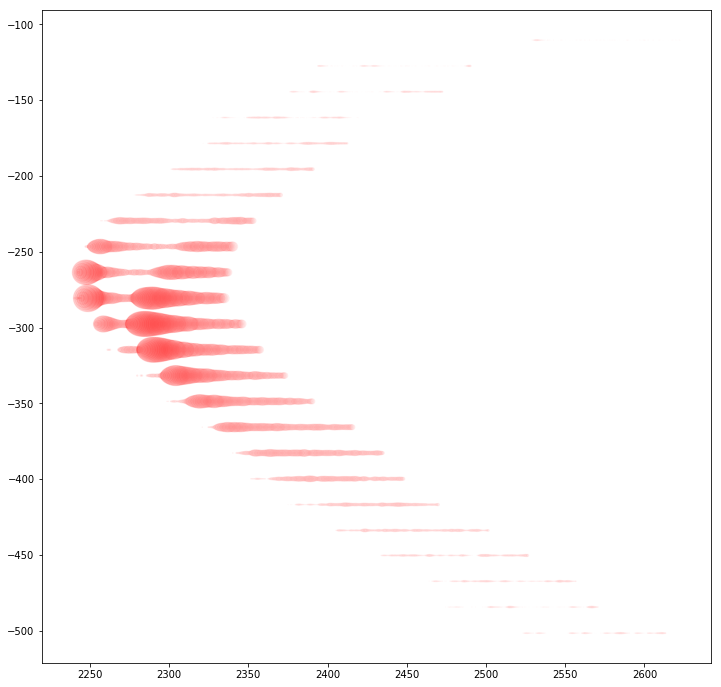

In [17]:
for i, event in enumerate(string_data[57:58]):
    print(i)
    make_plots_no_label(event)

In [18]:
def make_image(data):
    delta_t =300
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    data_sorted = data[data[:, 3].argsort()]
    start = data_sorted[:,3][0]
    mask = data_sorted[:,3]<(start+delta_t)
    data_cut = data_sorted[mask]
    y = np.unique(data_cut[:,2])
    width = 3.3333
    x_min = data_cut[:,3][0]
    x_max = data_cut[:,3][-1]
    x_bin = (x_max-x_min)/width+1

    H, xedg, yedg, im =  ax.hist2d(data_cut[:,3],data_cut[:,2],weights=data_cut[:,4],bins=[x_bin,len(y)],range = [[x_min,x_max],[y[0],y[-1]]], cmap='Spectral_r') 
    plt.show()
    return H

0


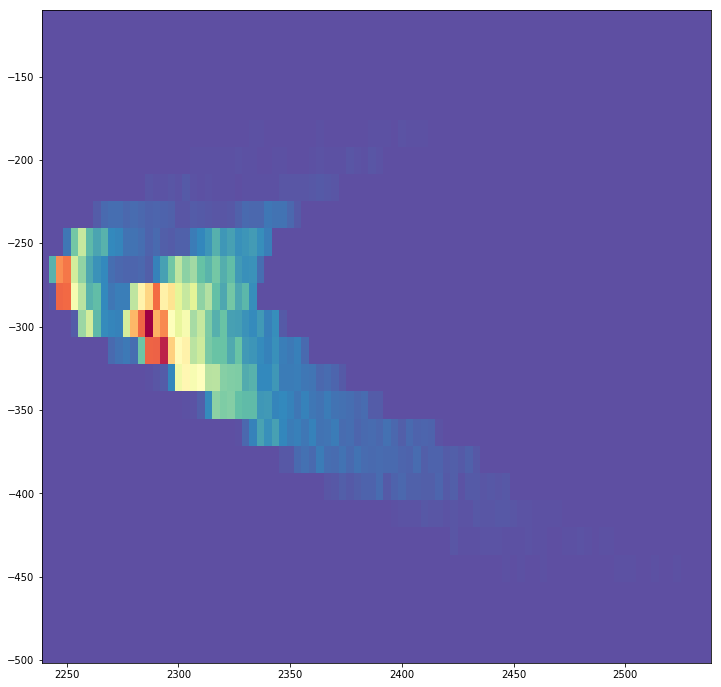

In [19]:
ims = []
for i, event in enumerate(string_data[57:58]):
    print(i)
    ims.append(make_image(event))
    #np.save("array_events_59.npy",ims)

In [20]:
def make_oversampled_image(data, N=10):
    delta_t =300
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(211)
    uniq_z = np.unique(data[:,2])
    start_z = []    
    for i in range(0,len(uniq_z)):
        mask_z = data[:,2] == uniq_z[i]
        zdata = data[mask_z]
        st = np.min(zdata[:, 3])
        start_z.append(st)
    
    
    zt = list(zip(uniq_z,start_z))
    zt_new = []
    for i in range(0,len(zt)-1):
        for j in range(0,N):
            zt_new.append([zt[i][0],zt[i][1],zt[i+1][0],zt[i+1][1],j/N]) 
            
    zt_new = np.stack(zt_new)
    
    zt_plot = []
    for i in zt_new:
        zt_plot.append([i[0]+(i[2]-i[0])*i[4],i[1]+(i[3]-i[1])*i[4],i[0],i[1],(i[3]-i[1])*i[4]])
    zt_plot = np.stack(zt_plot)
    
    ax.scatter(zt_plot[:,1],zt_plot[:,0])
    ax.scatter(zt_plot[:,3],zt_plot[:,2])
        
    new_data = []
    for i in zt_new:
        maskz = data[:,2] == i[0]
        maskz2 = data[:,2] == i[2]
        zdata = data[maskz]
        zdata2 = data[maskz2]
        
        zdata = zdata[zdata[:, 3].argsort()]
        zdata2 = zdata2[zdata2[:, 3].argsort()]
        zdata[:,2] = (i[0]+(i[2]-i[0])*i[4])*np.ones(len(zdata[:,2]))
        zdata[:,3] = zdata[:,3]+(i[3]-i[1])*i[4]*np.ones(len(zdata[:,3]))
        zdata[:,4] = zdata[:,4]*(1-i[4])+zdata2[:,4]*(i[4])
        #print zdata[:,2:5][0],zdata[:,2:5][-1]
        new_data.append(zdata)
    
    flat_data = []
    for i in new_data:
        for j in i:
            flat_data.append(j)
    
    flat_data = np.stack(flat_data)
    #print flat_data[:,2:4][0:200]
    start = np.min(flat_data[:,3])
    mask = flat_data[:,3]<(start+delta_t)
    data_cut = flat_data[mask]
    uniq_z = np.unique(data_cut[:,2])
    #print data_cut[:,3]
    width = 3
    x_min = np.min(data_cut[:,3])
    x_max = np.max(data_cut[:,3])
    x_bin = (x_max-x_min)/width+1
    #print len(uniq_z),width,x_max,x_min,x_bin
    ax2 = fig1.add_subplot(212)
    
    #H, xedg, yedg, im =  ax2.hist2d(data_cut[:,3],data_cut[:,2],weights=data_cut[:,4],bins=len(uniq_z), cmap='gray') 
    H, xedg, yedg, im =  ax2.hist2d(data_cut[:,3],data_cut[:,2],weights=data_cut[:,4],bins=[x_bin,len(uniq_z)],range = [[x_min,x_max],[uniq_z[0],uniq_z[-1]]], cmap='gray') 

    #    #plt.show()
    return H

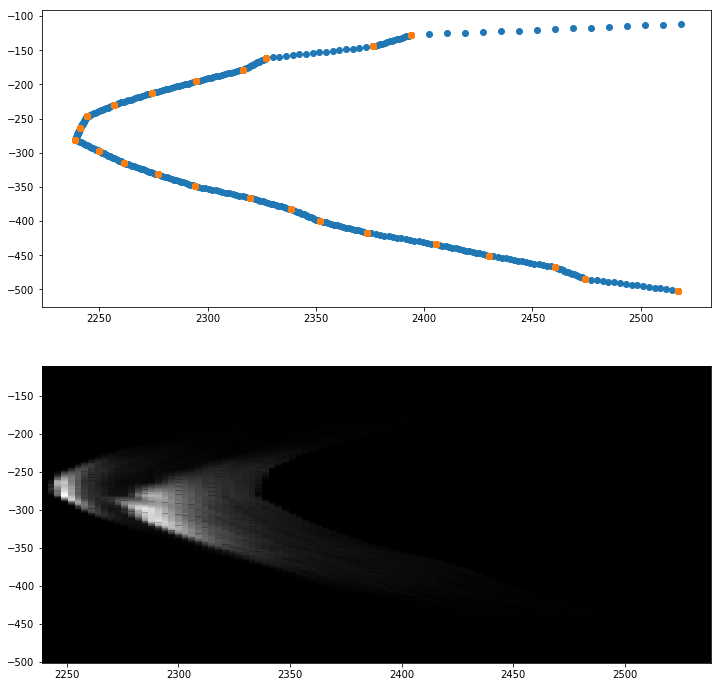

In [21]:
ims_over = []
for i, event in enumerate(string_data[57:58]):
    ims_over.append(make_oversampled_image(event,16))

In [22]:
def smooth(data, kernel):
    im_gauss = ndimage.convolve(data, kernel, mode='constant', cval=0.0)
    #im_gauss_3 = ndimage.convolve(im_gauss_2, kernel, mode='constant', cval=0.0)
    #im_gauss = ndimage.convolve(im_gauss_3, kernel, mode='constant', cval=0.0)
    
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    ax.imshow(im_gauss.T, interpolation='nearest', aspect='auto', cmap= 'gray')
    plt.show()
    return im_gauss

In [23]:
def gaussian_kernel(size, sigma1=5, sigma2 =5):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma1 * sigma2)
    g =  np.exp(-(x**2 / (2.0*sigma1**2) + y**2 / (2.0*sigma2**2))) * normal
    return g#g[size,np.newaxis].T#g[size-2:size+3,:]

[[0.00542492 0.00576037 0.00587674 0.00576037 0.00542492]
 [0.00576037 0.00611658 0.00624014 0.00611658 0.00576037]
 [0.00587674 0.00624014 0.0063662  0.00624014 0.00587674]
 [0.00576037 0.00611658 0.00624014 0.00611658 0.00576037]
 [0.00542492 0.00576037 0.00587674 0.00576037 0.00542492]]


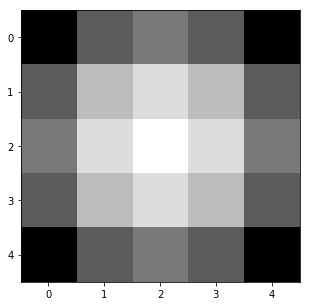

In [24]:
kern = gaussian_kernel(5,5,5)
print
fig1 = plt.figure(figsize=(5, 5))
ax = fig1.add_subplot(111)
ax.imshow(kern, interpolation='nearest', aspect='auto', cmap= 'gray')
print(kern)

0


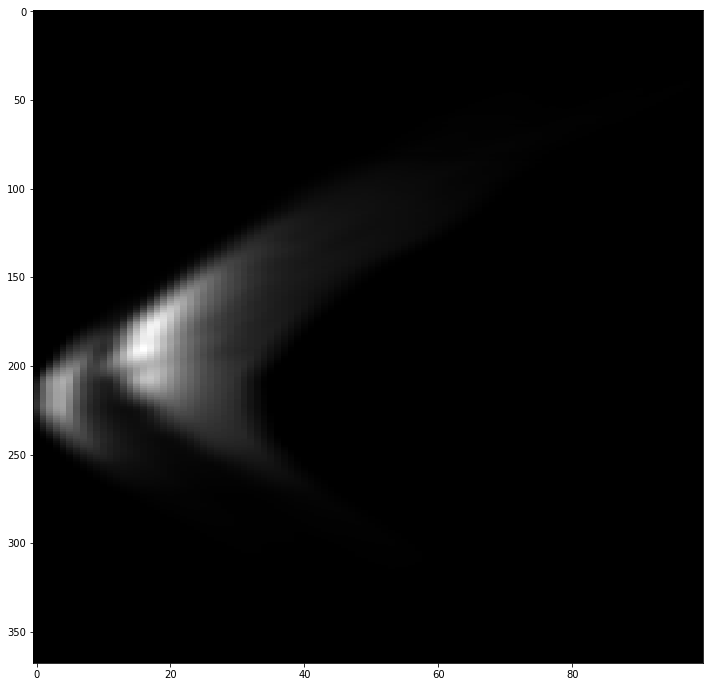

In [25]:
ims_smooth = []
for i, event in enumerate(ims_over):
    print(i)
    ims_smooth.append(smooth(event, kern))

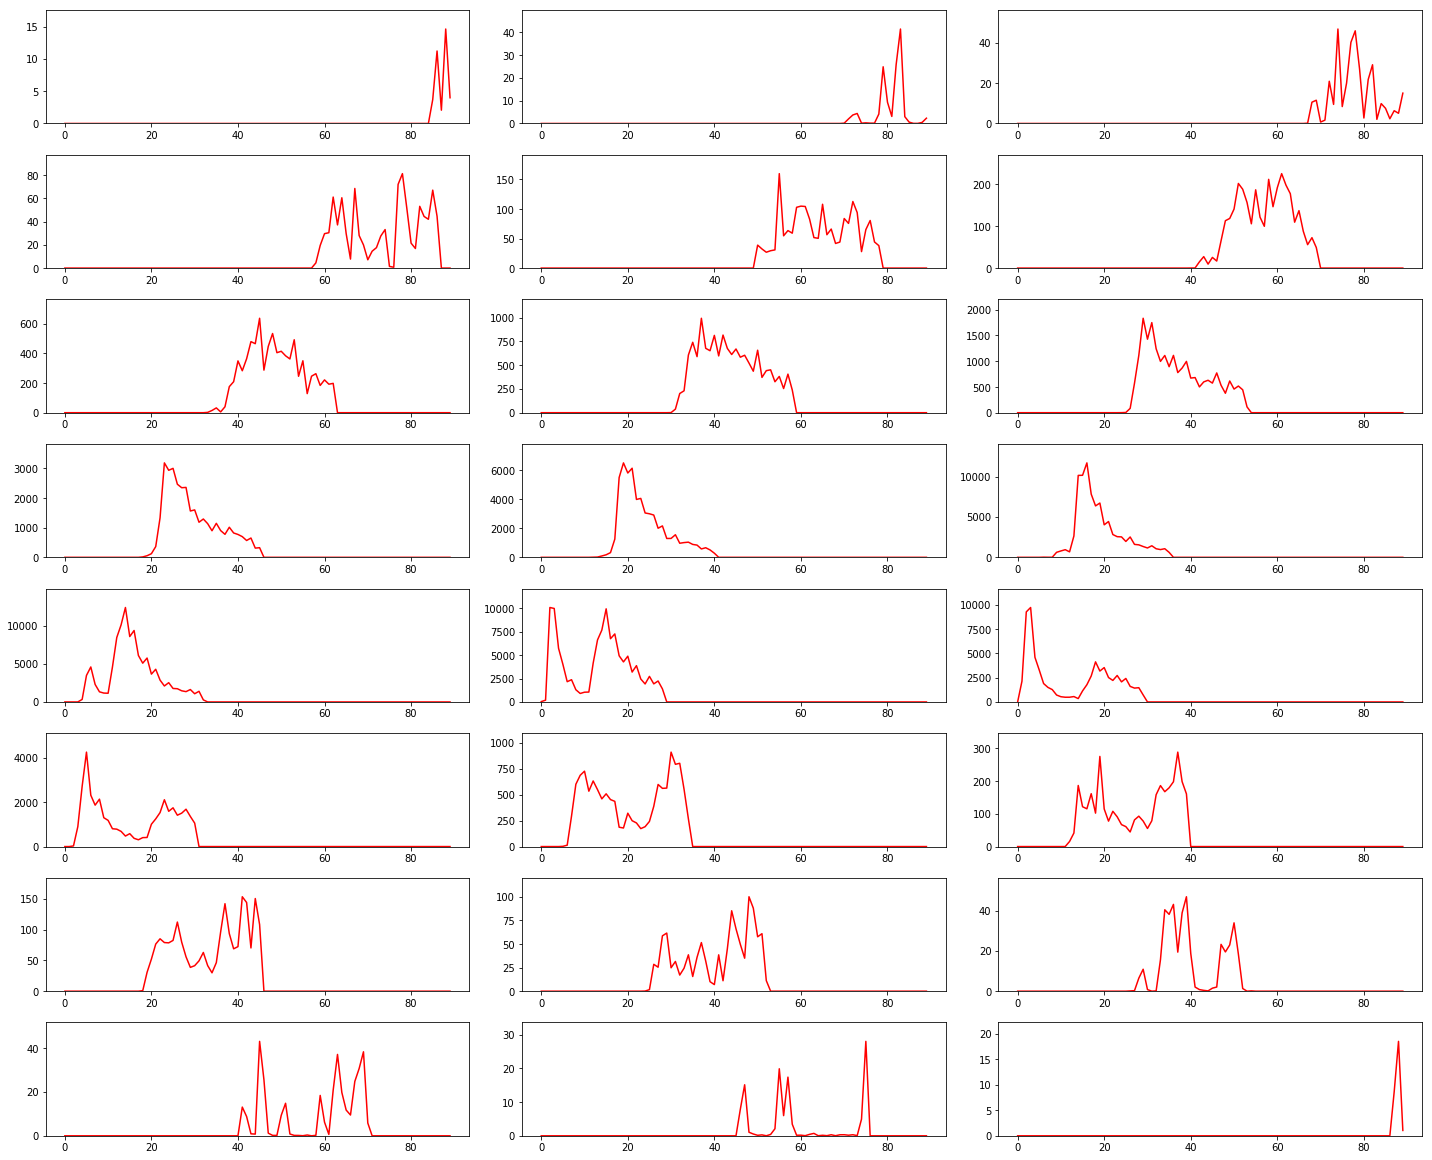

In [26]:
for i, event in enumerate(ims):
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    for i, q in enumerate(event.T):
        wf_data = q
        max_wf = np.max(wf_data)
        times = range(0,len(wf_data))
        ax = fig.add_subplot(10, 3, i+1)
        ax.set_ylim(0,max_wf*1.2)
        ax.plot(times,wf_data,'r', label = "ONE")
    fig.tight_layout()
    plt.show()
 

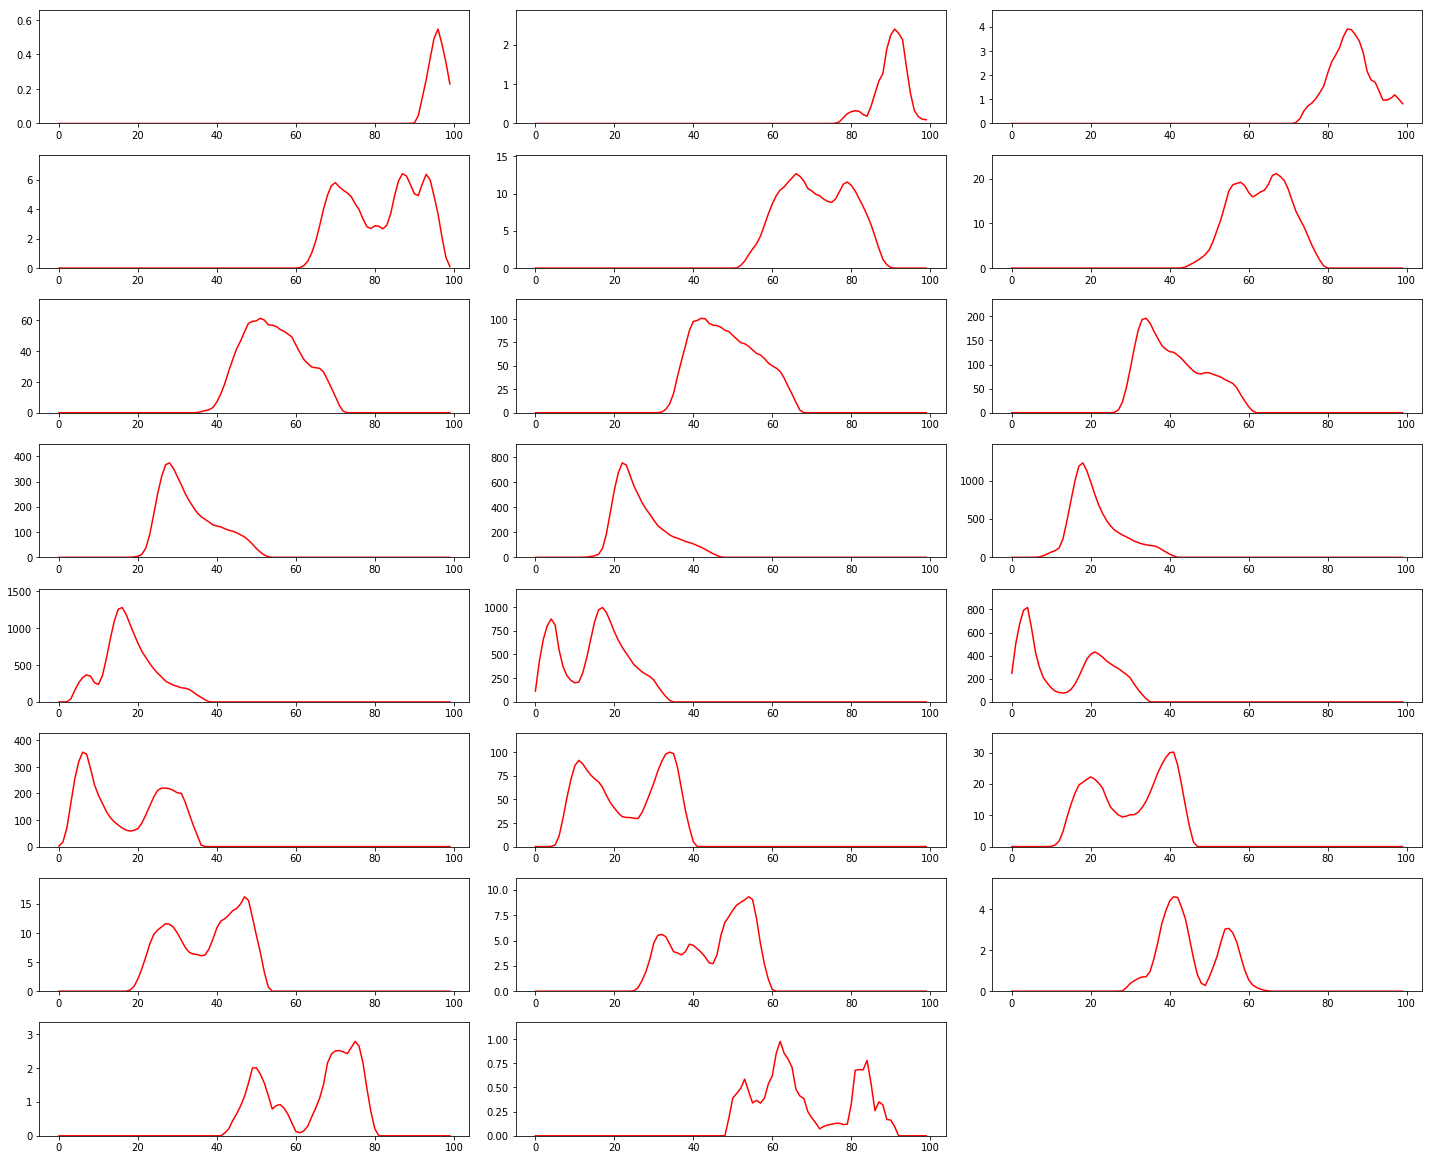

In [27]:
for i, event in enumerate(ims_smooth):
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    for j, q in enumerate(event.T):
        if j%16 ==0:
            i= int(j/16)
            wf_data = q
            max_wf = np.max(wf_data)
            times = range(0,len(wf_data))
            ax = fig.add_subplot(10, 3, i+1)
            ax.set_ylim(0,max_wf*1.2)
            ax.plot(times,wf_data,'r', label = "ONE")  
    fig.tight_layout()
    plt.show()
 

In [28]:
def sobel_filters(img):
    K = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
    #Ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], np.float32)
    #Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
    #Ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], np.float32)
    #Kx = np.array([[1, 0], [0, -1]], np.float32)
    #Ky = np.array([[0, 1], [-1, 0]], np.float32)
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    G = ndimage.filters.convolve(img, Ky)

    #G = np.hypot(Ix, Iy)
    #G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    theta = 90*np.ones(G.shape)
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(211)
    ax.imshow(G.T, interpolation='nearest', aspect='auto', cmap= 'seismic')
    #ax = fig1.add_subplot(212)
    #ax.imshow(theta, interpolation='nearest', aspect='auto', cmap= 'gray')
    
    plt.show()
    
    return (img, G, theta)
    #return G

0


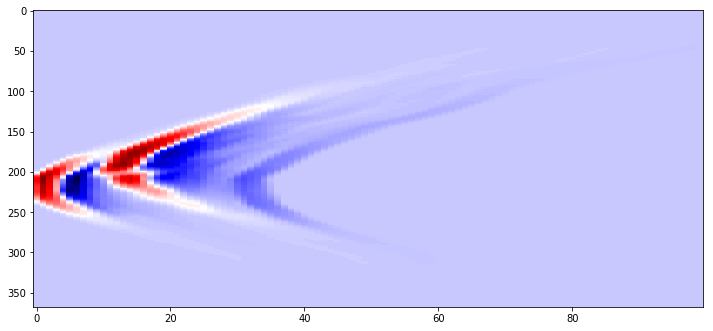

In [29]:
ims_sobel = []
for i, event in enumerate(ims_smooth):
    print(i)
    ims_sobel.append(sobel_filters(event))

In [39]:
def zerocross(im, thresh =0.1):
    M, N = im.shape
    labels = np.zeros((M,N), dtype=np.int32)
    for i in range(0,M-2):
        for j in range(0,N-2):
            #if im[i+1,j+1] ==0:
            #     labels[i+1,j+1]=1
            #else:
            n1 = im[i,j+1]
            n2 = im[i+2,j+1]
                
            if (n1*n2 < 0) and ((abs(n1)+abs(n2)) > thresh):
                labels[i+1,j+1]=1
                
            n3 = im[i+1,j]
            n4 = im[i+1,j+2]
                
            if (n3*n4 < 0) and ((abs(n2)+abs(n4)) > thresh):
                labels[i+1,j+1]=1
            
            n5 = im[i,j]
            n6 = im[i+2,j+2]
                
            if (n3*n4 < 0) and ((abs(n2)+abs(n4)) > thresh):
                labels[i+1,j+1]=1
            
            n7 = im[i+2,j]
            n8 = im[i,j+2]
                
            if (n3*n4 < 0) and ((abs(n2)+abs(n4)) > thresh):
                labels[i+1,j+1]=1
            
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(211)
    ax.imshow(labels.T, interpolation='nearest', aspect='auto', cmap= 'gray')
    return labels

In [33]:
ims_zero = []
for i, event in enumerate(ims_sobel):
    print(i)
    ims_zero.append(zerocross(event, thresh =100))

0


AttributeError: 'tuple' object has no attribute 'shape'

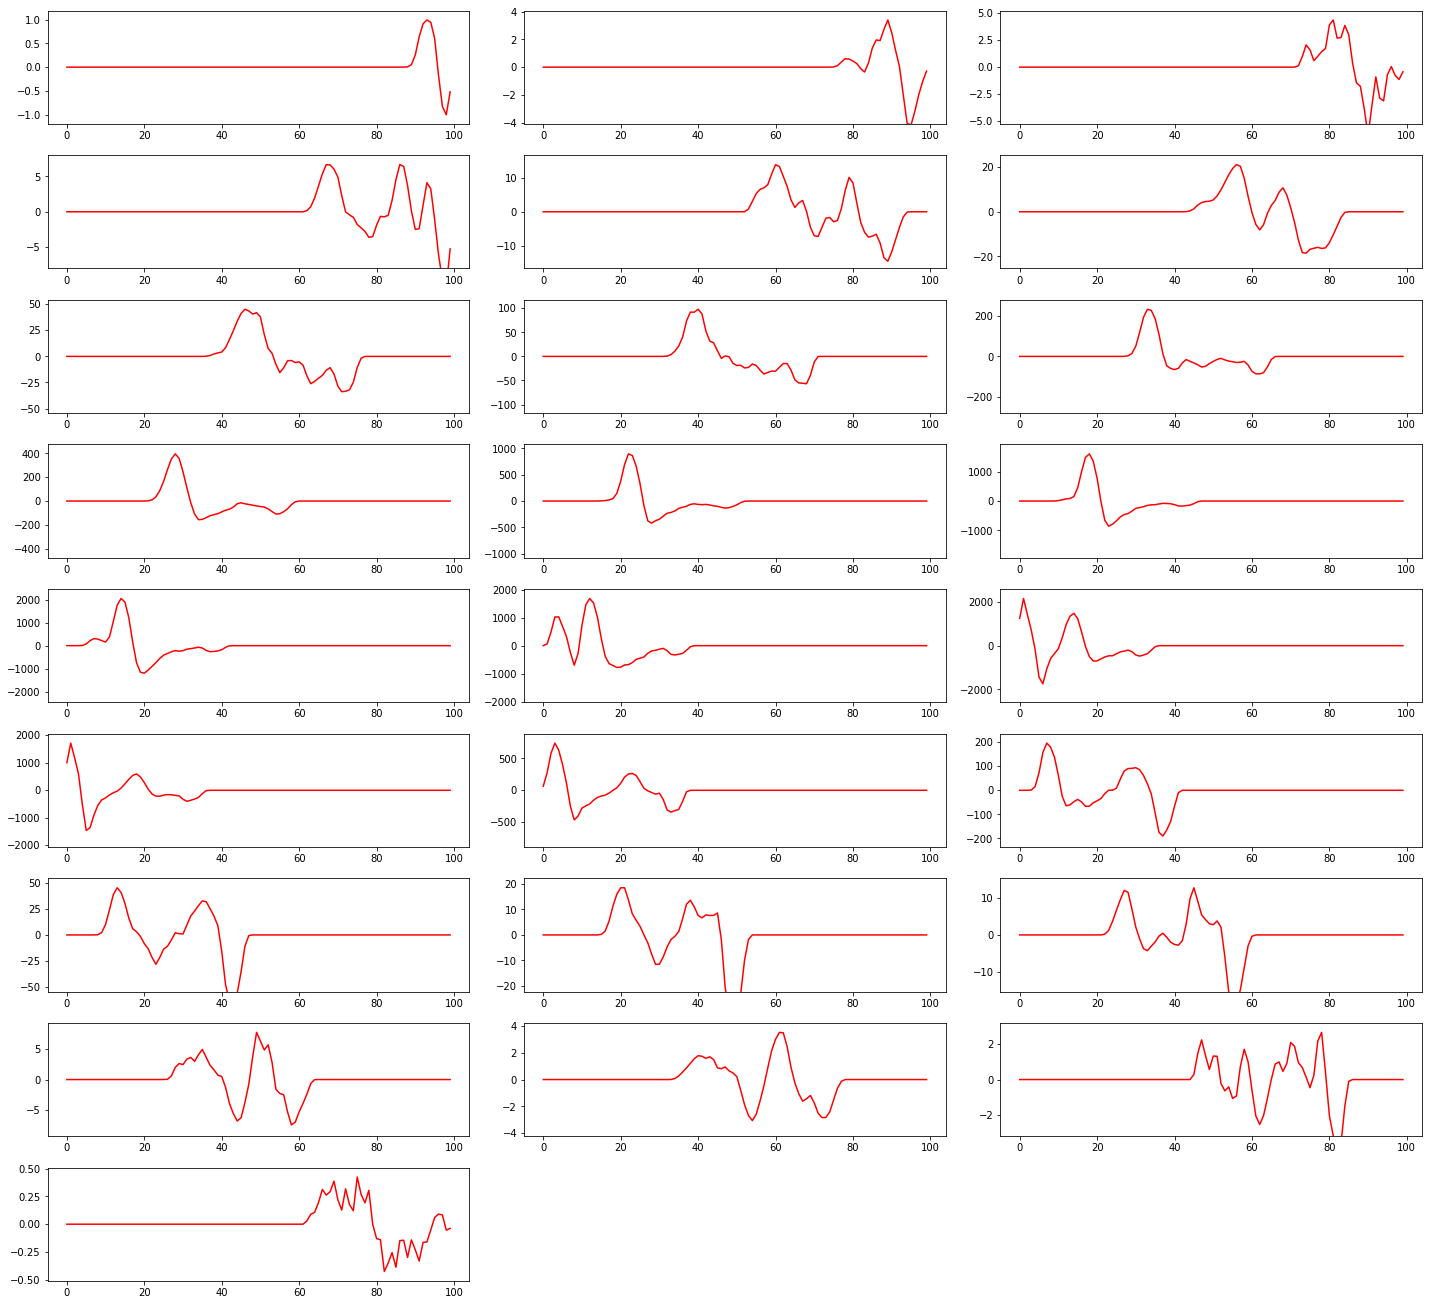

In [30]:
for i, event in enumerate(ims_sobel):
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    for j, q in enumerate(event[1].T):
        if j%15 ==0:
            i= int(j/15)
            wf_data = q
            max_wf = np.max(wf_data)
            times = range(0,len(wf_data))
            ax = fig.add_subplot(10, 3, i+1)
            ax.set_ylim(-max_wf*1.2,max_wf*1.2)
            ax.plot(times,wf_data,'r', label = "ONE")  
    fig.tight_layout()
    plt.show()
 

In [31]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 100
                r = 100
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

0


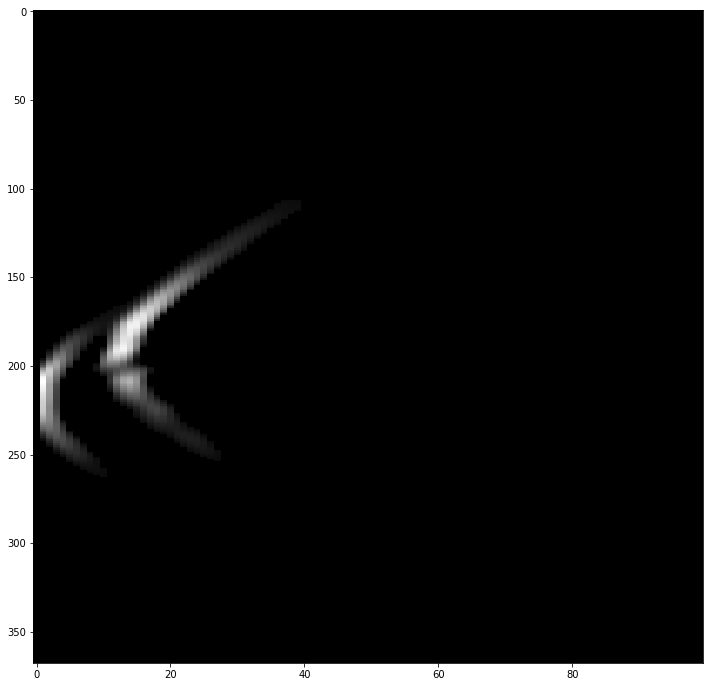

In [32]:
ims_supressed = []
for i, event in enumerate(ims_sobel):
    print (i)
    im = non_max_suppression(event[1],event[2])
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    ax.imshow(im.T, interpolation='nearest', aspect='auto', cmap= 'gray')
    plt.show()
    ims_supressed.append(im)

In [33]:
def threshold(img, lowThresholdRatio=0.1, highThresholdRatio=0.01):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(0)
    strong = np.int32(1)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

0


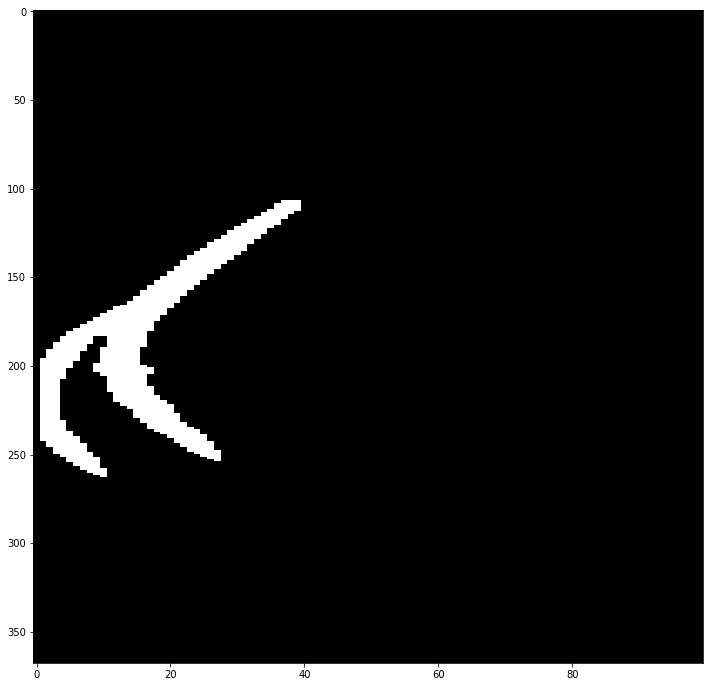

In [34]:
ims_thresh = []
for i, event in enumerate(ims_supressed):
    print(i)
    im,w,st = threshold(event)
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    ax.imshow(im.T, interpolation='nearest', aspect='auto', cmap= 'gray')
    plt.show()
    ims_thresh.append(im)

In [77]:
def find_seg(col,seg_n):
    for row in range(1,len(col)):
        if col[row] == 0:
            continue
        if col[row-1] == 0:
            col[row] = seg_n 
            seg_n = seg_n + 1
        else: 
            col[row] = col[row-1]
    return col, seg_n

def is_sublist(a, b):
    if len(a) == 0: return True
    if len(b) == 0: return False
    if len(a)>len(b): return False
    if len(a)==len(b): return all(b == a)
    if all(b[:len(a)] == a): return True
    return is_sublist(a, b[1:])

def find_num_segs(row):
    segs =[]
    segs_n = 0
    for col in range(0,len(row)):
        el = row[col]
        if col ==0: #or el != cluster[row][col-1]::
            segs.append([el,1])
            segs_n = 1
        if el != row[col-1]:
            segs_n = segs_n + 1
            segs.append([el,1])
        else:
            segs[segs_n-1][1] = segs[segs_n-1][1]+1
    return np.stack(segs)

def C3(img):
    
    M,N = img.shape
    label = []
    seg_n = 1
    for col in range(0,len(img)):
        if col == 0:
            line, seg_n = find_seg(img[col],seg_n)    
            label.append(line)
        else:
            line, seg_n = find_seg(img[col],seg_n)    
            last_line = label[col-1]
           
            intersect = []
            for row in range(0,len(line)):
                if line[row]>0 and last_line[row]>0:
                    intersect.append([last_line[row],line[row]])
                    
            if not intersect:
                label.append(line)
                continue
                
            uniq = np.unique(intersect,axis = 0)
            for sw in uniq:
                line = [x if x!=sw[1] else sw[0] for x in line]        
           
            label.append(line) 
    
    label = np.stack(label)
    
    labels = np.unique(label)
    if len(labels)<2:
        return label
      
    for l in labels:
        mask = label==l
        num_l = np.sum(mask)
        
        if num_l <100:
            neighbours = []
            for r in range(0, len(label)):
                 for c in range(0, len(label[r])):
                        if label[r,c]==l:
                            for rl in range(r-1,r+2):
                                for cl in range(c-1,c+2):                                    
                                    local = label[rl,cl]
                                    pos = (local,rl,cl)
                            
                                    if not pos in neighbours and not local ==l:
                                        neighbours.append(pos)
                                        
            neighbours = np.stack(np.array(neighbours))
            if sum(neighbours[:,0])==0:
                label[label==l] =0
               
            uniq_nb = np.unique(neighbours[:,0],return_counts =True)
            uniq_nb = np.stack(uniq_nb)
            if uniq_nb[0][0] == 0:
                new_label = uniq_nb[0][1]
            else:    
                new_label = uniq_nb[0][0]
            label[label==l] = new_label
                           
    labels = np.unique(label)
    label = label.T
    
    for l in labels:
        if l ==0:
            continue
        
        row_segs = []
        split = []
        cluster = np.where(label==l, label, 0)
        
        for row in range(0,len(cluster)):
            segs = find_num_segs(cluster[row])          
            segs = np.stack(segs)
            look_for = np.array([0,l,0,l,0])
            is_there = False
            if len(segs)>4:
                is_there = is_sublist(look_for, segs[:,0])
            row_segs.append(segs) 
            split.append(is_there)
            
        merged = False
        split_len = 30
        look_for = np.ones(split_len)
        merged = is_sublist(look_for, split)
        if merged:
            split_segs = find_num_segs(split)
        
        print(split_segs)
        split_idx = 0
        for i in range(0,len(split_segs)):
            seg = split_segs[i]
            if seg[0]==1 and seg[1] > split_len:
                split_len = seg[1]
                split_idx = i
        
        print(split_idx)
        split_st_row = sum(split_segs[:i-1,1])
        split_end_row = sum(split_segs[:i,1])
        print (split_st_row,split_end_row)
        print(label[split_end_row-2])
        print(label[split_st_row+1])
#        for i in range(0, len(split)):
#            print(row_segs[i],split[i])
#            for s in range(1,segs-1):
#                if s[0]==l:
#                    print(s)
   # print(label)
    return label
    
    

[[  0 185]
 [  1  70]
 [  0 114]]
1
185 255
[0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


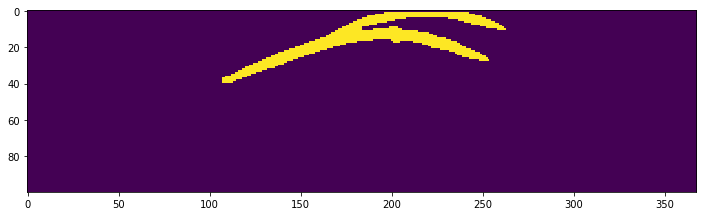

In [78]:
ims_clust = []
for i, im in enumerate(ims_thresh):
    img = C3(im)
    ims_clust.append(img)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img.T)
    

In [37]:
def two_pass(img):
    linked = []
    M, N = img.shape
    labels = np.zeros((M,N), dtype=np.int32)
    for i,row in enumerate(img.T):
        for j,col in enumerate(row):
            if col>0:
                #print i,j
                neighbors = img.T[i-1:i+2,j-1:j+2]
                neighbors = list(neighbors.flatten())
                del neighbors[4]
                #if not all([x ==0 for x in neighbors]):
                    #print(neighbors)
                
                

In [ ]:
for i, im in enumerate(ims_thresh):
    two_pass(im)

In [ ]:
ims_clust = []
for i, im in enumerate(ims_thresh):
    print i
    clusters = []
    for idx, r in enumerate(im>T):
        row_piece = []
        for idy, el in enumerate(r):
            if el>0:
                
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111)
    ax.imshow(im.T, interpolation='nearest', aspect='auto', cmap= 'gray')
    plt.show()
    ims_clust.append(im)